# EDA - Haberman Cancer Survival Dataset.

## Haberman's Dataset :

### Reference:

1. https://www.kaggle.com/gilsousa/habermans-survival-data-set 
2. knowledge shelf (Youtube channel) for some coding related help.

### Dataset's Information :

The Dataset contains the observations of a study that was conducted between 1958 & 1970 at University of Chicago's billing Hospital on the survival of patients who had undergone breast cancer surgery.

### Attribute Information :

1. Patient's age at the time of operation (numerical values)
2. Patient's year of operation (numerical values)
3. Number of positive Axillary nodes detected (numerical values)
4. Status of Survival (class attribute). 1 = The patient survived 5 years or longer. 2 = The patient died
   within 5 years of operation

### Objective :

To Predict whether a patient will survive 5 years or more after the operation based on the above mentioned attributes.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("haberman.csv", names = ["patient_age","operation_year","positive_axillary_nodes","survival_status"])
df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [22]:
# no of datapoints and features
# datapoints of class attribute
print("The number of datapoints and features: ", df.shape)
print("\n")
print("Datapoints of class attribute: ")
df["survival_status"].value_counts()

The number of datapoints and features:  (306, 4)


Datapoints of class attribute: 


1    225
2     81
Name: survival_status, dtype: int64

### Observation :

1. Toatal 306 datapoints with 4 features.
2. Target attribute contains two classes, class 1 and class 2.
3. class 1 respresents the patients who survived the operation 5 years or more and class 2 represents the patients who died    within 5 years of operation.
4. class 1 contains 225 values and class 2 contains 81 values. Since the difference in number of values between both the classes is high, so the dataset is considered to be as imbalanced.

In [23]:
# Statistical Summary of Survived and Dead Patients.
mask1 = df["survival_status"] == 1
df_survived = df.loc[mask1]

mask2 = df["survival_status"] == 2
df_dead = df.loc[mask2]
print("\n")
print("*********The statistical summary of survived patients********")
df_survived.describe()



*********The statistical summary of survived patients********


,patient_age,operation_year,positive_axillary_nodes,survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [5]:
print("\n")
print("*********The statistical summary of dead patients*********")
df_dead.describe()



*********The statistical summary of dead patients*********


,patient_age,operation_year,positive_axillary_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


### Observation :

1. The statistical summary of both the classes shows the statistics of patient_age and operation_year are similar,       positive_axillary_nodes is the only parameter which varies only to a limited extent.
2. 75% of patients those who survived had positive axillary nodes less than or equal to 3, and the 75% of patients who died had postive axillary nodes less than or equal to 11. The patients with less number of positive nodes has higher chance of survival.
3. The number of positive_axillary_nodes may not be considered as an important feature to classify our objective, beacuse there were patients who died without any positive axillary node.( minimum value of positive nodes for dead is "0".

## Univariate analysis based on different features

### 1. patient_age.

### 1.a Histogram with pdf

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


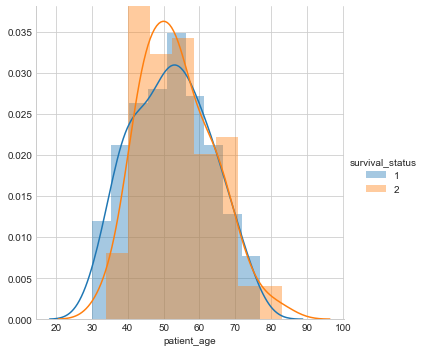

In [6]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status", size = 5).map(sns.distplot,"patient_age").add_legend()
plt.show()

### 1.b PDF and CDF plot

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


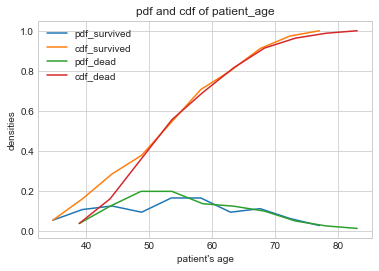

In [7]:
counts,bin_edges = np.histogram(df_survived["patient_age"], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(bin_edges)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts,bin_edges = np.histogram(df_dead["patient_age"], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf of patient_age")
plt.xlabel("patient's age")
plt.ylabel("densities")
plt.legend(["pdf_survived","cdf_survived","pdf_dead","cdf_dead"])

plt.show()

### 1.c Box plot

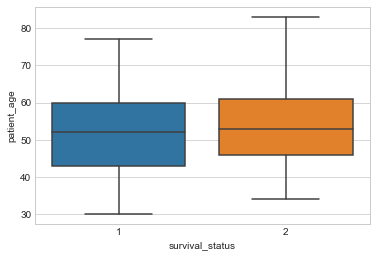

In [8]:
sns.boxplot(x = "survival_status", y = "patient_age", data = df)
plt.show()

### 1.d Violin plot

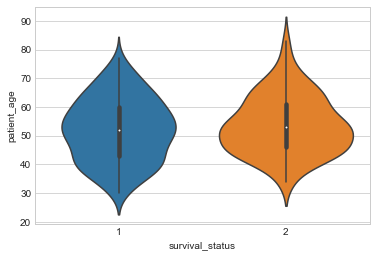

In [9]:
sns.violinplot(x = "survival_status", y = "patient_age", data = df, size = 8)
plt.show()

### Observation

1. Analysis based on patient's age give similar plot for both the classes.
2. Huge overlap between the survived and dead classes, which makes difficult to classify. Simple if-else condition cant be applied.
3. Patient's age univariately is not an important feature to determine the servival of patients.

### 2. operation_year

### 2.a Histogram with pdf

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


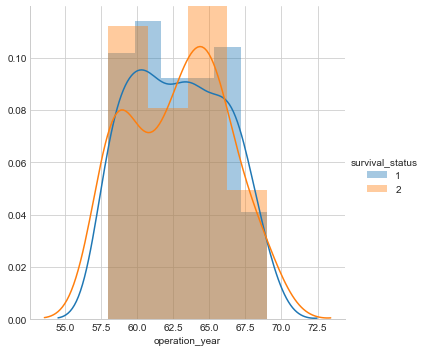

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status", size = 5).map(sns.distplot, "operation_year").add_legend()
plt.show()

### 2.b pdf and cdf plot

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


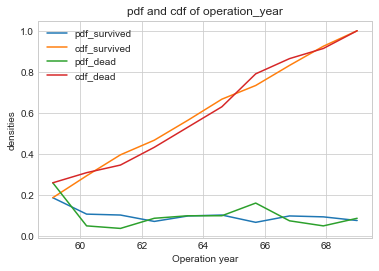

In [11]:
counts,bin_edges = np.histogram(df_survived["operation_year"], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(df_dead["operation_year"], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("pdf and cdf of operation_year")
plt.xlabel("Operation year")
plt.ylabel("densities")
plt.legend(["pdf_survived","cdf_survived","pdf_dead","cdf_dead"])

plt.show()


### 2.c Box plot

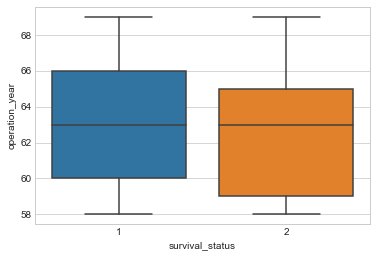

In [12]:
sns.boxplot(x = "survival_status", y = "operation_year", data = df)
plt.show()

### 2.d Violin plot

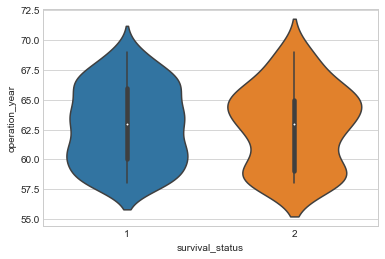

In [13]:
sns.violinplot(x = "survival_status", y = "operation_year", data = df, size = 8)
plt.show()

### Observation

1. Univariate analysis of operation_year give a huge amount of overlap in all the cases. It is very difficult to classify our objective using year of operation as a feature.
2. operation_year is not at all an important feature for determinig the survival of patients

### 3. positive_axillary_nodes

### 3.a Histogram with pdf

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


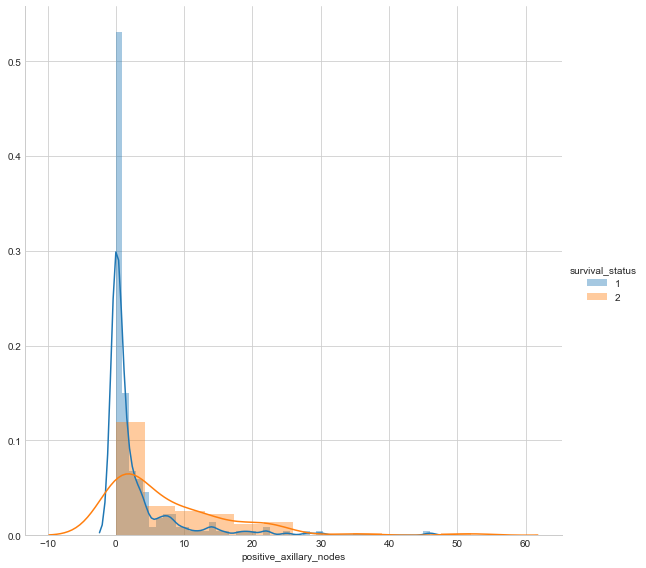

In [14]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status", size = 8).map(sns.distplot, "positive_axillary_nodes").add_legend()
plt.show()

### 3.b pdf and cdf plot

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


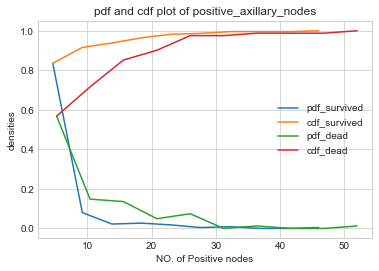

In [15]:
counts,bin_edges = np.histogram(df_survived["positive_axillary_nodes"], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(pdf)
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(df_dead["positive_axillary_nodes"], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(pdf)
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("pdf and cdf plot of positive_axillary_nodes")
plt.xlabel("NO. of Positive nodes")
plt.ylabel("densities")
plt.legend(["pdf_survived","cdf_survived","pdf_dead","cdf_dead"])

plt.show()

### 3.c Box plot

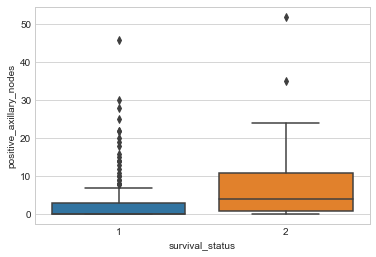

In [16]:
sns.boxplot(x = "survival_status", y = "positive_axillary_nodes", data = df)
plt.show()

### 3.d Violin plot

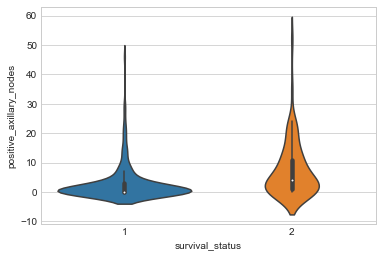

In [17]:
sns.violinplot(x = "survival_status", y = "positive_axillary_nodes", data = df, size = 8)
plt.show()

### Observation

1. Comparing to other features overlapping of datapoints is less here, but overlap still exists so it is difficult to set a threshold point for the nodes to differentiate both class of patients.
2. 50% of the patients who survived had no positive axillary nodes.
3. Chance of survival decreases with increase in number of positive nodes
4. quite a small percentage of patients who died had no positive axillary nodes.So less number of nodes cannot guarantee survival.

## Bivariate Analysis 

### Pair Plot

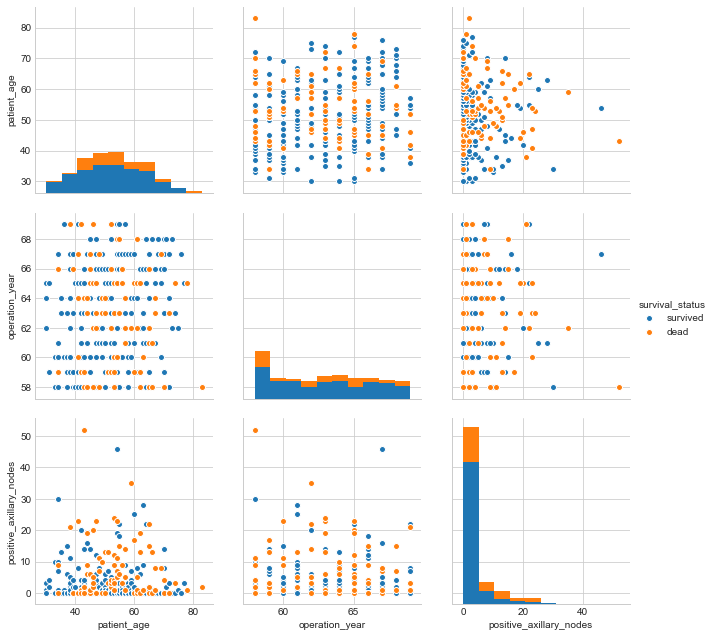

In [18]:
plt.close()
df["survival_status"] = df["survival_status"].apply(lambda x: "survived" if x == 1 else "dead")
sns.set_style("whitegrid")
sns.pairplot(df, hue = "survival_status", size = 3)
plt.show()

### Observation

1. Can't be separated linearly.
2. No. of Positive_axillary_nodes doesnot depend on age of patient or the year of operation.
3. It is very difficult to classify using these features.

## Multivariate Analysis

### Contour plot 

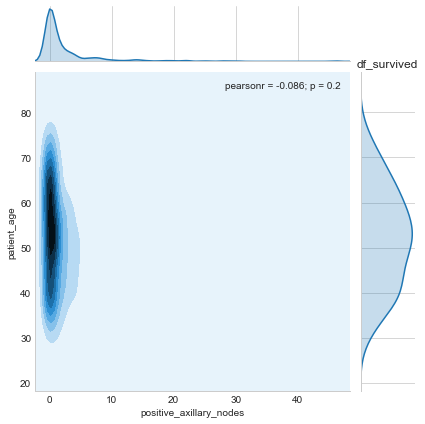

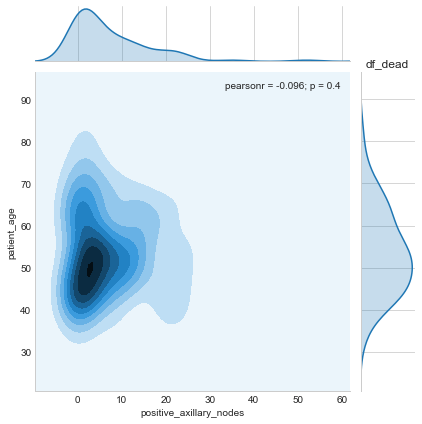

In [19]:
sns.jointplot(x = "positive_axillary_nodes", y = "patient_age", data = df_survived, kind = "kde")
plt.title("df_survived")
plt.show()


sns.jointplot(x = "positive_axillary_nodes", y = "patient_age", data = df_dead, kind = "kde")
plt.title("df_dead")
plt.show()

### Observation:

1. Relationship can't be established between age of patient and the number of positive axillary nodes.  
2. Its very hard to conclude any result from it.

## Conclusions :

1. Patients age and year of operation are not the deciding features to predict the status of survival.

2. we have seen that increasing the number of positive nodes, decreases the chance of survival. But at the same time there are number of parients died with no positive nodes.

3. We cannot predict the chances of survival with these features, even if we make a simple model the chances of error will be very high

4. So the objective of the dataset to classify the survival status of a new patient is a difficult task.